## 项目背景
  
自学数据分析以来，到现在也算学了不少内容，一直想着花点时间把自己学习的知识复习回顾一遍，做一些实战项目多多练习，以增加熟练度。正巧在kaggle看项目的时候，找到一个感兴趣的项目资料，关于美国1880年-2014年的婴儿名字频率数据。本项目打算着重复习python数据分析相关的知识，主要包括numpy, pandas和matplotlib这几个库。  
  
本项目数据来自于官方公布的真实数据，数据来源于kaggle,网络地址：[US Baby Names](https://www.kaggle.com/kaggle/us-baby-names)

## 观察数据  

本数据包含有美国从1880年-2014年的婴儿名字频率数据。数据列名的含义如下：
  
Id: 行号  
Name: 名字  
Year: 出生年份  
Gender: 性别  
Count: 名字总计数量  

## 1. 提出问题
根据数据，初步思考，提出以下问题：

1.1880年-2014年美国男女婴儿总出生数的年度变化趋势如何？    
2.父母对于为孩子取常见名的意愿是怎么样的？  
3.父母为孩子取名最爱用哪个首字母和哪个尾字母？

## 2. 数据整理

### 2.1.导入数据&查看基本信息

In [57]:
#建立一个Ipython文件，导入本项目可能用到的库，如数据分析的numpy和pandas,作图的matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
#先使用pandas的read_csv函数导入数据
names = pd.read_csv('babynames/NationalNames.csv')

In [59]:
#查看数据的基本信息
names.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [60]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825433 entries, 0 to 1825432
Data columns (total 5 columns):
Id        int64
Name      object
Year      int64
Gender    object
Count     int64
dtypes: int64(3), object(2)
memory usage: 69.6+ MB


In [61]:
names.isnull().sum()

Id        0
Name      0
Year      0
Gender    0
Count     0
dtype: int64

1.取样的数据，有5个字段，包括1825433条记录;  
2.没有缺失值，不需要缺失值处理，是一份很好的数据。

### 2.2.数据处理

插入prop列,表示指定名字的婴儿数相对于总出生数的比例

In [62]:
#定义一个函数add_prop，作用是先将year和gender 分组，再计算指定名字的婴儿数相对于总出生数的比例。
def add_prop(data):
    #转换格式，换为浮点数
    Count = data.Count.astype(float)
    #创建一列，列名为prop，计算指定名字的婴儿数相对于总出生数的比例。ps：不同年份相同名字属于不同名字。
    data['prop'] = Count / Count.sum()
    return data
names = names.groupby(['Year','Gender']).apply(add_prop)

## 数据分析&可视化

### 问题解答

#### 第一个问题：1880年-2014年美国男女婴儿总出生数的年度变化趋势如何？

In [63]:
# 求男女每年的总出生数,使用groupby聚合函数和unstack()函数
total_count = names.groupby(['Year','Gender']).sum()
total_count=total_count['Count'].unstack()

In [64]:
#查看函数前五项
total_count.head()

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


Text(0,0.5,'The number of baby')

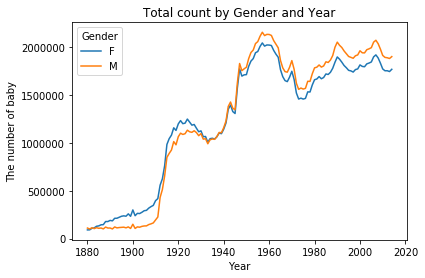

In [65]:
#作折线图
total_count.plot()
plt.title('Total count by Gender and Year')
plt.ylabel('The number of baby')

从图中可以看出：  
1.美国每年出生人口增长呈现波动性增长，而在近30年来，每年出生人口趋于稳定。    
  
2.其中在1910年-1920年和1940年-1960年，有着飞速发展的情况。分析其增长原因：  
  2.1.1910年-1920年，美国处于经济飞速发展阶段，人口增长固然伴随着经济发展。  
  2.2.1940年-1960年是由于二战结束之后，军人复原带来的婴儿潮。  
  
资料来源：[美国全国卫生统计中心：美国人口出生率降至30年最低](http://www.199it.com/archives/726263.html)  
[美国人口_百度百科](https://baike.baidu.com/item/%E7%BE%8E%E5%9B%BD%E4%BA%BA%E5%8F%A3/3198477?fr=aladdin)

#### 第二个问题：父母对于为孩子取常见名的意愿是怎么样的？

为了了解父母是否倾向于为孩子取常见名，我需要计算常见名在所有名字中的比例。  
由于名字太多，我定义最多人取的1000个名字为常见名，并且计算其所占比例。

In [66]:
#取names的一个子集，前1000个最多人取的名字。
def gettop1000(group):
    return group.sort_values(by='Count',ascending = False)[:1000]
grouped = names.groupby(['Year','Gender'])
top1000 = grouped.apply(gettop1000)

In [67]:
# 使用pivot_table函数在Year和 Gender级别上将数据聚合
top1000_prop = top1000.pivot_table('prop',index = 'Year',columns = 'Gender',aggfunc = sum)

D:\Anaconda\lib\site-packages\pandas\core\reshape\pivot.py:81: FutureWarning: 'Year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)
D:\Anaconda\lib\site-packages\pandas\core\reshape\pivot.py:81: FutureWarning: 'Gender' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


In [68]:
top1000_prop.head()

Gender,F,M
Year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539


Text(0,0.5,'prop')

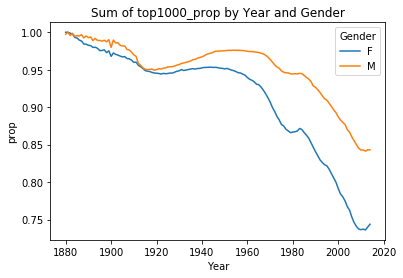

In [69]:
top1000_prop.plot(title = 'Sum of top1000_prop by Year and Gender')
plt.ylabel('prop')

由图中可以看出：  
1.常见名的比例逐年下降，从1880年的接近百分之百，如今的百分之80左右。  
2.虽然如今常见名比例还是比较高，但是这个下降趋势表示愿意给孩子取常见名字的父母越来越少。  
3.这种趋势还表明，受各种因素影响，名字的多样性在不断增长。

#### 第三个问题：父母为孩子取名最爱用哪个首字母和哪个尾字母？

In [70]:
# 创建lambda函数
get_first_letter = lambda x : x[0]
get_last_letter = lambda x : x[-1]

#使用lambda函数，从names.Name取每一项的首字母和尾字母
first_letters = names.Name.map(get_first_letter)
last_letters = names.Name.map(get_last_letter)

# 以防搞混，把列名改一下
first_letters.name = 'first_letter'
last_letters.name = 'last_letter'


In [71]:
#用groupby函数统计数量
sum_first_letters = names.pivot_table('Count',index = first_letters, columns =['Gender'],aggfunc = sum)
sum_last_letters = names.pivot_table('Count',index = last_letters, columns =['Gender'],aggfunc = sum)

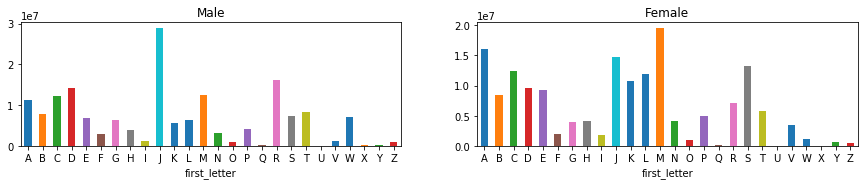

In [72]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
sum_first_letters['M'].plot(kind = 'bar',title = 'Male',rot=0,figsize = (15,5))
ax1 = fig.add_subplot(2,2,2)
sum_first_letters['F'].plot(kind = 'bar',title = 'Female',rot=0,figsize = (15,5))

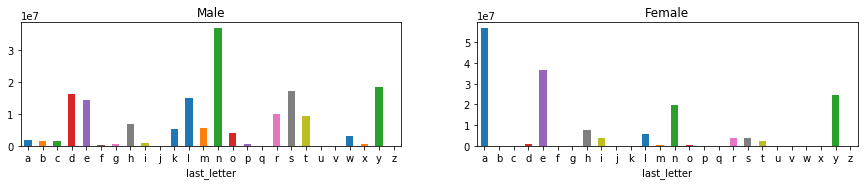

In [73]:
fig = plt.figure()
ax3 = fig.add_subplot(2,2,1)
sum_last_letters['M'].plot(kind = 'bar',title = 'Male',rot=0,figsize = (15,5))
ax4 = fig.add_subplot(2,2,2)
sum_last_letters['F'].plot(kind = 'bar',title = 'Female',rot=0,figsize = (15,5))

由图上可知：  
1.对于男孩子，父母喜欢取以'J','R','D'为首字母的名字和以'N','Y','S'为尾字母的名字。  
2.对于女孩子，父母喜欢取以'M','A','J'为首字母的名字和以'A','E','Y'为尾字母的名字。